#  Prediction Model

> **Course**: Data Mining

> **Author**: Enes Kemal 

> **  Date**: 05/02/2017


Implementing the logistic regression model on the Titanic data to predict the likelyhood of the events. I will be using binary outcome classification.

Data introduction:
---

- **Survival**: This refers to the survival of the passengers (0 = No and 1 = Yes)
- **Pclass**: This refers to the passenger class (1 = 1st, 2 = 2nd, and 3 = 3rd)
- **Name**: This refers to the names of the passengers
- **Sex**: This refers to the gender of the passenger
- **Age**: This refers to the age of the passengers
- **Sibsp**: This refers to the number of siblings/spouses aboard
- **Parch**: This refers to the number of parents/children aboard
- **Ticket**: This refers to the ticket number
- **Fare**: This refers to the passenger fares
- **Cabin**: This refers to the cabin
- **Embarked**: This refers to the port of embarkation (C = Cherbourg, Q = Queenstown, and S = Southampton)


Data Preparation and Cleaning 
---

In [8]:
# Libraries used in the notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices # descriptive statistical models (similar to R "formulas")

# Inline plotting
%matplotlib inline

In [9]:
df = pd.read_csv('./eneskemal_PredModel.csv')
df.count(0) # Counting missing values in the data
# I am going to get rid of cabin(almost empty), Ticket(just an id), 
#  and Name(I don't need names of passengers) columns

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
# Applying axis as 1 to remove the columns with the following labels
df = df.drop(['Ticket','Cabin','Name'], axis=1)
# Remove missing values
df = df.dropna()

In [11]:
df.count()

PassengerId    712
Survived       712
Pclass         712
Sex            712
Age            712
SibSp          712
Parch          712
Fare           712
Embarked       712
dtype: int64

Data Seperation
---

In [12]:
# Creating a formula that specifies numerical, categorical variables and 
#  their dependencies 
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked) + Parch'
df_train = df.iloc[ 0: 600, : ]
df_test = df.iloc[ 600: , : ]

# Splitting the data into dependent and independent variables
y_train,x_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test, return_type='dataframe')

Model Building and Evaluation
---

In [13]:
from sklearn.linear_model import LogisticRegression
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x_train, y_train.Survived)

In [16]:
# examine the coefficients
pd.DataFrame(list(zip(x_train.columns, np.transpose(model.coef_))))
# The first column contains our dependent variable name and the second column
#  contains the coefficient values.


,0,1
0,Intercept,[1.76714885294]
1,C(Pclass)[T.2],[-0.855297665892]
2,C(Pclass)[T.3],[-2.05150890647]
3,C(Sex)[T.male],[-2.36757593644]
4,C(Embarked)[T.Q],[-0.268544547557]
5,C(Embarked)[T.S],[-0.265577528299]
6,Age,[-0.0309255780811]
7,SibSp,[-0.26002373595]
8,Parch,[-0.0967816203051]


In [17]:
# how our precision and recall are performing:
y_pred = model.predict_proba(x_test)
y_pred_flag = y_pred[:,1] > 0.7

pd.crosstab(y_test.Survived ,y_pred_flag ,
             rownames = ['Actual'] ,colnames = ['Predicted'])

Predicted,False,True
Actual,,
0.0,66,1
1.0,21,24


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_flag))

             precision    recall  f1-score   support

        0.0       0.76      0.99      0.86        67
        1.0       0.96      0.53      0.69        45

avg / total       0.84      0.80      0.79       112



In [23]:
from sklearn.metrics import roc_curve, auc
# ROC and area under the curve:
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.877944


> **What is ROC Curve:** The ROC curve is a fundamental tool for diagnostic test evaluation. In a ROC curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points of a parameter.

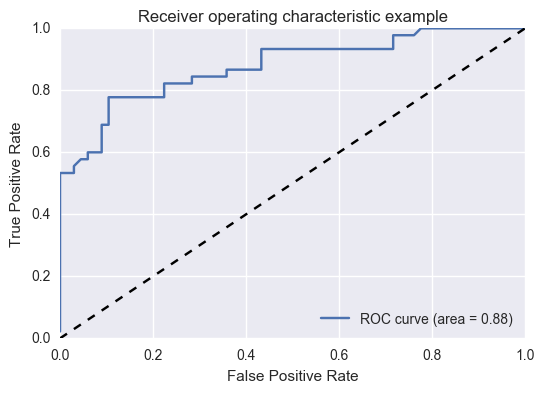

In [24]:
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()